# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
validation_file= './valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import csv
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
def getSignNames():
    '''
    create a dictionary that maps sign labels from integers to textual names
    '''
    # initialize the dictionary for sign names
    sign_names = {}

    # open the file containing sign label/names mappings
    with open('./signnames.csv', 'r') as f_signames:
    
        # create a csv.DictReader object
        reader = csv.DictReader(f_signames)
    
        for row in reader:
            sign_names[row['ClassId']] = row['SignName']

    return sign_names

In [5]:
def showImageSamples(images, labels, n_images, sign_names):
    '''
    Randomly select and show images from the data set
    '''

    indexes = np.random.choice(n_images, size = 100)

    # intialize the subplot
    fig, axes = plt.subplots(5, 5, figsize=(15, 10),
                             subplot_kw={'xticks': [], 'yticks': []})


    fig.subplots_adjust(hspace=0.5, wspace=0.05)

    for ax, idx in zip(axes.flat, indexes):
        ax.imshow(images[idx])
        sign_label = str(labels[idx])
        ax.set_title(sign_names[sign_label][:16] + " ...")

    plt.show()

Show some samples from the training set:

#############################
### Training image samples ##
#############################


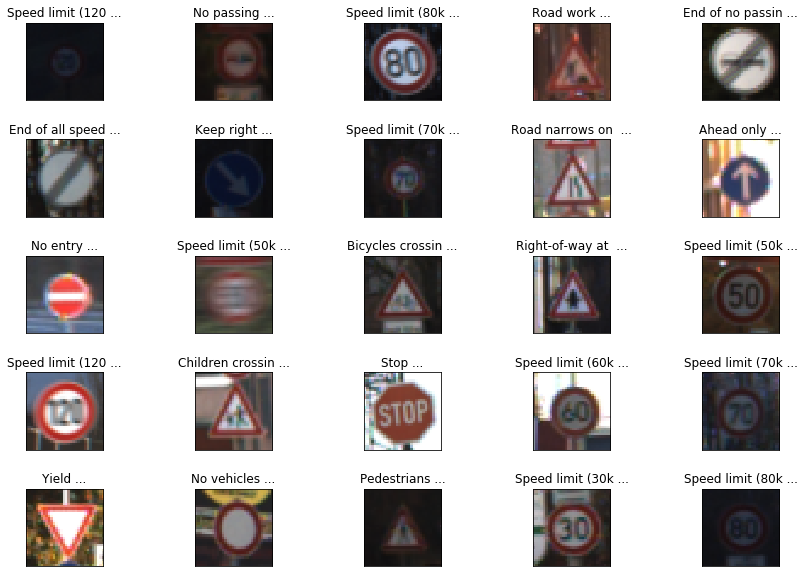

In [6]:
print('#############################')
print('### Training image samples ##')
print('#############################')

sign_names = getSignNames()
showImageSamples(X_train, y_train, n_train, sign_names)

Show some samples from the test set:

#########################
### Test image samples ##
#########################


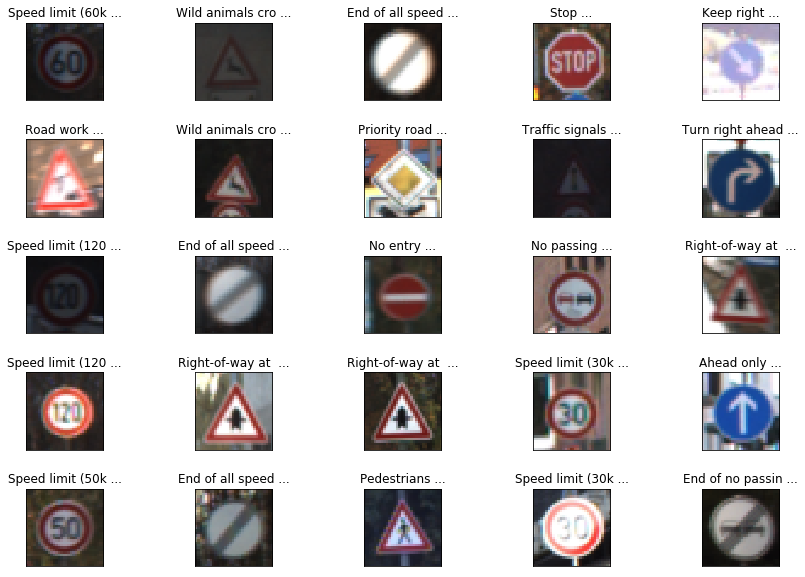

In [7]:
print('#########################')
print('### Test image samples ##')
print('#########################')

showImageSamples(X_train, y_train, n_train, sign_names)

#############################################
### Count of each sign in the training set ##
#############################################


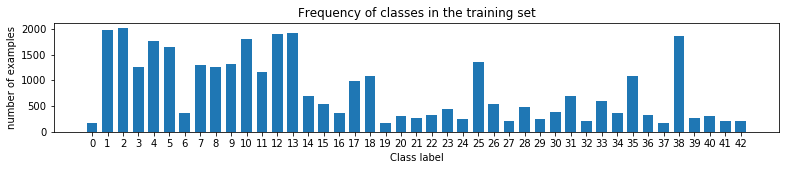

In [8]:
print('#############################################')
print('### Count of each sign in the training set ##')
print('#############################################')

plt.rcParams['figure.figsize'] = (13,2)
plt.xticks(range(n_classes))
plt.xlabel('Class label')
plt.ylabel('number of examples')
plt.title('Frequency of classes in the training set')
plt.hist(y_train, bins = range(n_classes + 1), align = 'left', rwidth = 0.7)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

## Normalizing the datasets values to the interval [-1,1]
X_train = (X_train.astype(np.float32) - 128) / 128
X_valid = (X_valid.astype(np.float32) - 128) / 128
X_test = (X_test.astype(np.float32) - 128) / 128

Convert labels to one-hot encoded format

In [10]:
from sklearn.preprocessing import OneHotEncoder

## create a one hot format of the integer labels

enc = OneHotEncoder(n_values = n_classes)

enc.fit(y_train[:, np.newaxis])
y_train_oh = enc.transform(y_train[:, np.newaxis]).toarray()

enc.fit(y_valid[:, np.newaxis])
y_valid_oh = enc.transform(y_valid[:, np.newaxis]).toarray()

enc.fit(y_test[:, np.newaxis])
y_test_oh = enc.transform(y_test[:, np.newaxis]).toarray()

### Model Architecture

Let's define the network architecture of the classifier

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
import numpy as np

def classifier(images_, keep_prob_):


    ## Layer 1
    ## Input size (batch_size, 32, 32, 3)
    ## Output size (batch_size, 16, 16, 32)
        
    x1 = tf.layers.conv2d(inputs = images_, 
                          filters = 32, kernel_size = 3, strides = 1, use_bias = True, padding = 'same')
    relu1 = tf.nn.relu(x1)
    pool1 = tf.nn.max_pool(value = relu1,
                           ksize = (1, 2, 2, 1),
                           strides = (1, 2, 2, 1),
                           padding = 'SAME')
    
    
    ## Layer 2
    ## Input size (batch_size, 16, 16, 32)
    ## Output size (batch_size, 8, 8, 64)
        
    x2 = tf.layers.conv2d(inputs = pool1, 
                          filters = 64, kernel_size = 3, strides = 1, use_bias = True, padding = 'same')
    relu2 = tf.nn.relu(x2)
    pool2 = tf.nn.max_pool(value = relu2,
                           ksize = (1, 2, 2, 1),
                           strides = (1, 2, 2, 1),
                           padding = 'SAME')
    
    pool2 = tf.nn.dropout(pool2, keep_prob = keep_prob_)
        
    ## Layer 3
    ## Input size (batch_size, 8, 8, 64)
    ## Output size (batch_size, 4, 4, 128)
        
    x3 = tf.layers.conv2d(inputs = pool2, 
                          filters = 128, kernel_size = 3, strides = 1, use_bias = True, padding = 'same')
    relu3 = tf.nn.relu(x3)
    pool3 = tf.nn.max_pool(value = relu3,
                           ksize = (1, 2, 2, 1),
                           strides = (1, 2, 2, 1),
                           padding = 'SAME')

    pool3 = tf.nn.dropout(pool3, keep_prob = keep_prob_)

    pool3_flat = tf.reshape(tensor = pool3, shape = (-1,  np.prod(pool3.get_shape().as_list()[1:])))

                
    ## Layer 4
    ## Input size (batch_size, 4 * 4 * 256)
    ## Output size (batch_size, n_classes)
        
    dense1 = tf.layers.dense(inputs = pool3_flat, units = 2000)
    dense1 = tf.nn.dropout(dense1, keep_prob = keep_prob_)
    logits = tf.layers.dense(inputs = dense1, units = n_classes)

    return logits

Compute the classifier's loss

In [12]:
def getLoss(logits, labels_):
      
    # get the cross entropy loss
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels_)
    )
    
    return loss    

Compute the classification accruacy

In [13]:
def getAccuracy(logits, labels_):
    
    # compute correct predictions
    correct_predictions = tf.equal(tf.argmax(logits, axis = 1), tf.argmax(labels_, axis = 1))
    
    # compute the accuracy as the percentage of correct predictions
    accuracy = tf.reduce_mean( tf.cast(correct_predictions, dtype = tf.float32))
    
    return accuracy

Define an optimizer

In [14]:
def getOptimizer(loss, learn_rate):
    
    opt = tf.train.AdamOptimizer(learning_rate = learn_rate).minimize(loss)
    
    return opt

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Let's define some hyperparameters:

In [15]:
learn_rate = 0.0001
batch_size = 128
keep_prob = 0.5
epochs = 40

Define a generator function that return image and label batches for training:

In [16]:
def getBatch(batch_size):
    
    # make a shuffled list of training set indexes
    train_idx = np.arange(n_train)
    
    np.random.shuffle(train_idx)
    
    # the start index of the batch
    start_idx = 0
    
    while start_idx < n_train:
        
        # create the image batch
        image_batch = X_train[train_idx[start_idx: start_idx + batch_size]]
        
        # create the label batch
        label_batch = y_train_oh[train_idx[start_idx: start_idx + batch_size]]
        
        start_idx += batch_size
        
        yield image_batch, label_batch

Let's train the model now, and test it on the validation set:

In [17]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# define some placeholders
images_ = tf.placeholder(shape = (None, 32, 32, 3), dtype = tf.float32)

labels_ = tf.placeholder(shape = (None, n_classes), dtype = tf.uint8)

keep_prob_ = tf.placeholder(dtype = tf.float32)

# build the classifier network to get the logits
logits = classifier(images_, keep_prob_)

# get the network loss
loss = getLoss(logits, labels_)

# get the classification accuracy
accuracy = getAccuracy(logits, labels_)

# create the optimizer
optimizer = getOptimizer(loss, learn_rate)

sess = tf.Session()
    
# initialize the network variables
sess.run(tf.global_variables_initializer())
    
# counter for training steps
train_steps = 0
    
# loop through epochs
for ep in range(epochs):
        
    # get the batches
    for image_batch, label_batch in getBatch(batch_size):
        
        # increment the training steps counter
        train_steps += 1
            
        # run a training step
        sess.run(optimizer, feed_dict = {images_ : image_batch, 
                                         labels_ : label_batch,
                                         keep_prob_ : keep_prob})
            
        # print some performance stats (training and validation loss and accuracy)
        if train_steps % 100 == 0:
                
            # get the loss and the accuracy on the training set
            train_loss, train_acc = sess.run((loss, accuracy), 
                                             feed_dict = {images_ : X_train, 
                                                         labels_ : y_train_oh,
                                                         keep_prob_ : 1})
                
            # get the loss and the accuracy on the validation set
            valid_loss, valid_acc = sess.run((loss, accuracy), 
                                              feed_dict = {images_ : X_valid, 
                                                           labels_ : y_valid_oh,
                                                           keep_prob_ : 1})
                
            # print some performance statistics
            print("Ep {}/{} | t-loss: {:.2f}, t-acc: {:.2f} | v-loss: {:.2f}, v-acc: {:.2f}"
                .format(ep + 1, epochs, train_loss, train_acc, valid_loss, valid_acc))

Ep 1/40 | t-loss: 3.37, t-acc: 0.16 | v-loss: 3.45, v-acc: 0.12
Ep 1/40 | t-loss: 2.91, t-acc: 0.27 | v-loss: 3.04, v-acc: 0.19
Ep 2/40 | t-loss: 2.54, t-acc: 0.35 | v-loss: 2.74, v-acc: 0.24
Ep 2/40 | t-loss: 2.20, t-acc: 0.40 | v-loss: 2.47, v-acc: 0.28
Ep 2/40 | t-loss: 1.97, t-acc: 0.47 | v-loss: 2.29, v-acc: 0.32
Ep 3/40 | t-loss: 1.76, t-acc: 0.52 | v-loss: 2.11, v-acc: 0.41
Ep 3/40 | t-loss: 1.60, t-acc: 0.57 | v-loss: 1.97, v-acc: 0.44
Ep 3/40 | t-loss: 1.46, t-acc: 0.63 | v-loss: 1.85, v-acc: 0.46
Ep 4/40 | t-loss: 1.33, t-acc: 0.66 | v-loss: 1.75, v-acc: 0.52
Ep 4/40 | t-loss: 1.22, t-acc: 0.68 | v-loss: 1.63, v-acc: 0.51
Ep 5/40 | t-loss: 1.10, t-acc: 0.73 | v-loss: 1.53, v-acc: 0.59
Ep 5/40 | t-loss: 0.99, t-acc: 0.74 | v-loss: 1.41, v-acc: 0.59
Ep 5/40 | t-loss: 0.92, t-acc: 0.77 | v-loss: 1.35, v-acc: 0.61
Ep 6/40 | t-loss: 0.83, t-acc: 0.79 | v-loss: 1.25, v-acc: 0.63
Ep 6/40 | t-loss: 0.76, t-acc: 0.82 | v-loss: 1.16, v-acc: 0.67
Ep 6/40 | t-loss: 0.70, t-acc: 0.84 | v-

Let's now compute the performance on the test set:

In [18]:
## ------- Get the Test accuracy ------- ##
    
# get the ccuracy on the test set
test_acc = sess.run(accuracy, 
                    feed_dict = {images_ : X_test, 
                                 labels_ : y_test_oh,
                                 keep_prob_ : 1})
    
print("###########################################")
print("## The accuracy on the test set is: {:.2f} ##".format(test_acc))
print("###########################################")

###########################################
## The accuracy on the test set is: 0.94 ##
###########################################


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

#################################################################
## Here are some example sign images I downloaded from the net ##
#################################################################


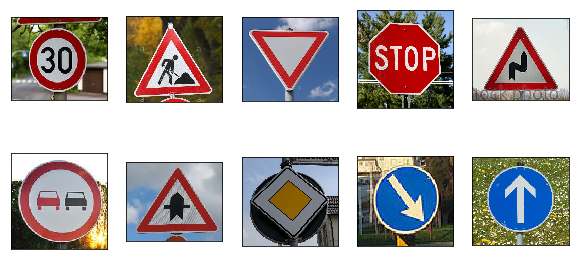

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
from PIL import Image

# the path to new images
image_path = './new_images/'

# get a list of image names included in 'image_path'
image_names = os.listdir(image_path)

# intialize the subplot
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                        subplot_kw={'xticks': [], 'yticks': []})


fig.subplots_adjust(hspace=0.1, wspace=0.2)

for ax, name in zip(axes.flat, image_names):
    img = Image.open(os.path.join(image_path, name))
    ax.imshow(img)

print("#################################################################")
print("## Here are some example sign images I downloaded from the net ##")
print("#################################################################")

plt.show()

Create the new image labels and encode them as one-hot vectors

In [20]:
new_labels = np.array([1, 25, 13, 14, 21, 9, 11, 12, 38, 35])
enc.fit(new_labels[:, np.newaxis])
new_labels_oh = enc.transform(new_labels[:, np.newaxis]).toarray()

### Predict the Sign Type for Each Image

In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

def getNewImagesBatch():
    '''
    creates a batch out of the new downloaded test images
    '''
    
    image_list = []

    # let's first create a batch out of these images
    for name in image_names:
    
        # pen the image file
        img = Image.open(os.path.join(image_path, name))
    
        # resize the imiage to (32,32)
        img = img.resize((32,32), Image.ANTIALIAS)
        img = np.asarray(img).astype(np.float32)  
    
        # normalize the image to the interval [-1,+1]
        img = (img - 128) / 128
    
        image_list.append(img)
 
    image_batch = np.array(image_list)
    
    return image_batch

Predict the labels for the new images using the classifier trained above:

############################################################################
## Here are the predicted labels for the images I downloaded from the net ##
############################################################################


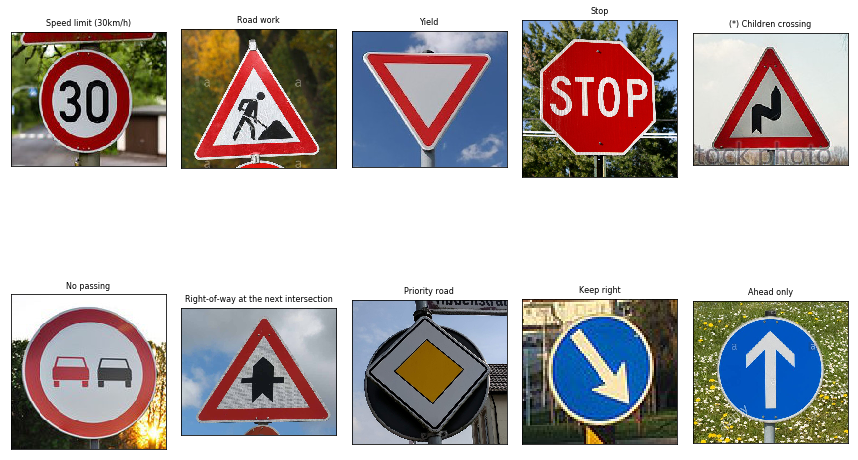

In [22]:
# get the batch of new images
new_images = getNewImagesBatch()

# get the logit values of the classifier
new_logits = sess.run(logits, feed_dict = {images_ : new_images,
                                           keep_prob_ : 1})

# get the predicted labels
pred_labels = np.argmax(new_logits, axis = 1)

print("############################################################################")
print("## Here are the predicted labels for the images I downloaded from the net ##")
print("############################################################################")

# intialize the subplot
fig, axes = plt.subplots(2, 5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})


fig.subplots_adjust(hspace=0.01, wspace=0.1)

for i, ax, name in zip(range(10), axes.flat, image_names):
    img = Image.open(os.path.join(image_path, name))
    ax.imshow(img)
    
    # get the predicted name from the predicted label
    pred_name = sign_names[str(pred_labels[i])]
    
    # create a string indicating whether the prediction if false '(*)' or not
    mark = '(*) ' if pred_labels[i] != [new_labels[i]] else ''
    
    ax.set_title(mark + pred_name, fontsize = 8)

plt.show()

Notice that the above images are visually similar to those of the dataset so I would expect a high test accuracy as in the case of the test set. Let's check that out:

### Analyze Performance

In [23]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

## ------- Get the Test accuracy on the new images ------- ##

# get the ccuracy on the test set
new_test_acc = sess.run(accuracy, 
                        feed_dict = {images_ : new_images, 
                                     labels_ : new_labels_oh,
                                     keep_prob_ : 1})
    
print("################################################")
print("## The accuracy on the {} new images is: {:.2f} ##".format(new_images.shape[0], new_test_acc))
print("################################################")

################################################
## The accuracy on the 10 new images is: 0.90 ##
################################################


This performance reflects well the performance obtained on the test set.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [24]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

# compute the softmax probabilities
softmax_probs = tf.nn.softmax(logits)

# get the top k probabilities and indices
top_k = tf.nn.top_k(softmax_probs, k = 5)

# run the session to get the results
pred_probs, pred_labels = sess.run(top_k, feed_dict = {images_ : new_images,
                                           keep_prob_ : 1})

# close the session finally
#sess.close()

Here is a detailed visualisation of the Top 5 probabilities and corresponding predictions for each of the images:



########### image 1 ###########


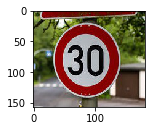

Top 5 probabilities: ['9.32e-01', '5.59e-02', '1.25e-02', '8.29e-07', '3.27e-07']
Corresponding labels: [ 1  0  2 21 24]
Corresponding names:
- Speed limit (30km/h)
- Speed limit (20km/h)
- Speed limit (50km/h)
- Double curve
- Road narrows on the right
Correct label: 1
Correct name: Speed limit (30km/h)


########### image 2 ###########


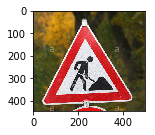

Top 5 probabilities: ['1.00e+00', '5.19e-08', '2.83e-09', '9.93e-10', '1.23e-10']
Corresponding labels: [25 22 27 28 24]
Corresponding names:
- Road work
- Bumpy road
- Pedestrians
- Children crossing
- Road narrows on the right
Correct label: 25
Correct name: Road work


########### image 3 ###########


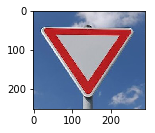

Top 5 probabilities: ['1.00e+00', '6.48e-20', '3.12e-20', '1.73e-20', '9.30e-21']
Corresponding labels: [13  1 15 14  3]
Corresponding names:
- Yield
- Speed limit (30km/h)
- No vehicles
- Stop
- Speed limit (60km/h)
Correct label: 13
Correct name: Yield


########### image 4 ###########


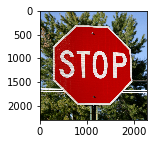

Top 5 probabilities: ['1.00e+00', '4.26e-12', '4.99e-14', '3.80e-14', '1.87e-14']
Corresponding labels: [14 17  3  1 25]
Corresponding names:
- Stop
- No entry
- Speed limit (60km/h)
- Speed limit (30km/h)
- Road work
Correct label: 14
Correct name: Stop


########### image 5 ###########


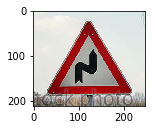

Top 5 probabilities: ['9.45e-01', '3.22e-02', '2.07e-02', '2.45e-03', '2.36e-05']
Corresponding labels: [28 11 20 30 23]
Corresponding names:
- Children crossing
- Right-of-way at the next intersection
- Dangerous curve to the right
- Beware of ice/snow
- Slippery road
Correct label: 21
Correct name: Double curve


########### image 6 ###########


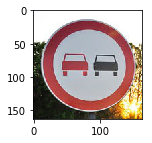

Top 5 probabilities: ['1.00e+00', '1.04e-04', '5.13e-06', '4.84e-07', '5.57e-09']
Corresponding labels: [ 9 15 41 10 16]
Corresponding names:
- No passing
- No vehicles
- End of no passing
- No passing for vehicles over 3.5 metric tons
- Vehicles over 3.5 metric tons prohibited
Correct label: 9
Correct name: No passing


########### image 7 ###########


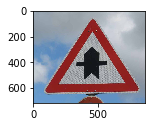

Top 5 probabilities: ['1.00e+00', '2.04e-04', '1.55e-08', '7.78e-10', '7.08e-10']
Corresponding labels: [11 30 27 21 24]
Corresponding names:
- Right-of-way at the next intersection
- Beware of ice/snow
- Pedestrians
- Double curve
- Road narrows on the right
Correct label: 11
Correct name: Right-of-way at the next intersection


########### image 8 ###########


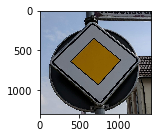

Top 5 probabilities: ['1.00e+00', '1.72e-09', '1.13e-09', '1.95e-10', '5.62e-12']
Corresponding labels: [12 42 32 10 17]
Corresponding names:
- Priority road
- End of no passing by vehicles over 3.5 metric tons
- End of all speed and passing limits
- No passing for vehicles over 3.5 metric tons
- No entry
Correct label: 12
Correct name: Priority road


########### image 9 ###########


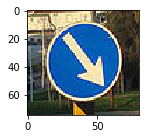

Top 5 probabilities: ['1.00e+00', '3.08e-07', '2.19e-07', '5.22e-12', '1.50e-15']
Corresponding labels: [38 34 36 40 35]
Corresponding names:
- Keep right
- Turn left ahead
- Go straight or right
- Roundabout mandatory
- Ahead only
Correct label: 38
Correct name: Keep right


########### image 10 ###########


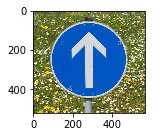

Top 5 probabilities: ['1.00e+00', '4.86e-09', '1.34e-09', '9.85e-11', '3.50e-11']
Corresponding labels: [35 36 37 40 34]
Corresponding names:
- Ahead only
- Go straight or right
- Go straight or left
- Roundabout mandatory
- Turn left ahead
Correct label: 35
Correct name: Ahead only


In [25]:
plt.rcParams["figure.figsize"] = (2,2)

for i in range(10):
   
    # open the corresponding image
    img = Image.open(os.path.join(image_path, image_names[i]))
    
    print("\n\n########### image {} ###########".format(i+1))
    
    plt.imshow(img)
    plt.show()
    
    
    print("Top 5 probabilities: {}".format(str(["{:.2e}".format(p) for p in pred_probs[i]])))
    
    print("Corresponding labels: {}".format(pred_labels[i]))
    
    print("Corresponding names:")
    
    for j in range(5):
        print("- {}".format(sign_names[str(pred_labels[i][j])]))
    
    print("Correct label: {}".format(new_labels[i]))
    print("Correct name: {}".format(sign_names[str(new_labels[i])]))

Notice that the classifier is very confident of its predictions even in the erroneous cases. Here is another less detailed visualisation of the top 5 predictions:

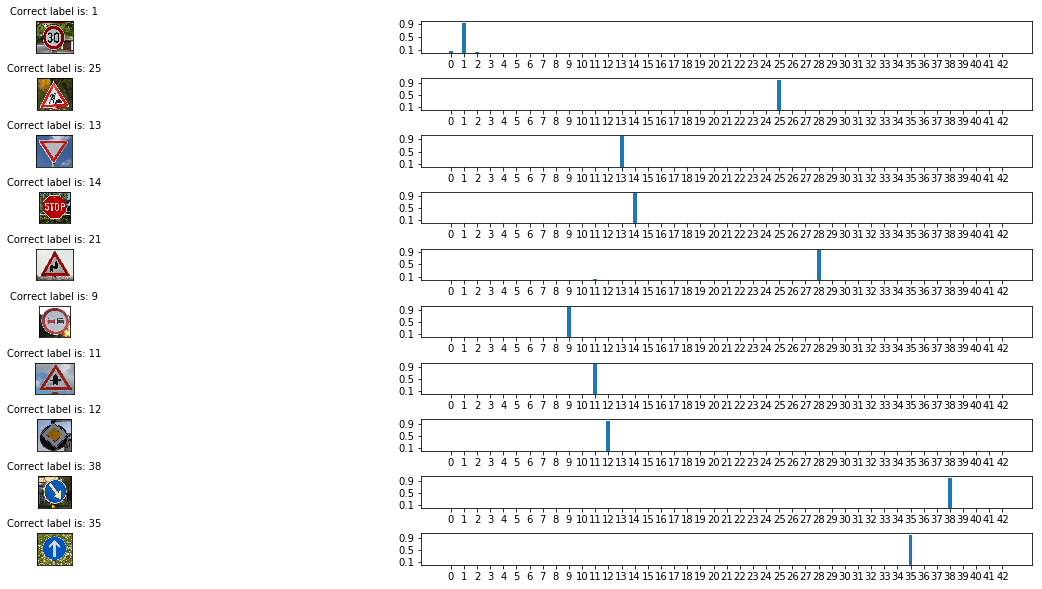

In [26]:
# intialize the subplot
fig, axes = plt.subplots(10, 2, figsize=(23, 10),
                        subplot_kw={'xticks': [], 'yticks': []})


fig.subplots_adjust(hspace=0.8, wspace=0.1)

for i, name in zip(range(10), image_names):
    
    # create the probability array
    probs = np.zeros((n_classes), dtype = np.float32)
    probs[pred_labels[i]] = pred_probs[i]
    
    # open the corresponding image
    img = Image.open(os.path.join(image_path, name))
    axes[i,0].imshow(img)
    axes[i,0].set_title("Correct label is: {}".format(new_labels[i]), fontsize = 10)

    axes[i,1].bar(range(n_classes), probs, width = 0.3, align = 'center')
    axes[i,1].set_xticks(range(n_classes))
    axes[i,1].set_yticks([0.1,0.5,0.9])
    

plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [27]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")